## 导入包&数据

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.decomposition import PCA #降维-主成分分析

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
# 加载数据集
cancer = pd.read_csv("D:/project/Jupyter/csdn/AI_ML/datasets/L5_1Cancer.csv")

In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 数据预处理

In [5]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# 删除无意义的第32列
to_drop = ["Unnamed: 32"]
cancer = cancer.drop(cancer[to_drop], axis=1)

## 数据标准化

In [7]:
# 设定特征和标签
X = cancer.drop(columns=["diagnosis"])  
y = cancer["diagnosis"]

In [8]:
# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 建模

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
knn=KNeighborsClassifier()

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred_test_knn=knn.predict(X_test)

In [13]:
# 打印准确率报表，准确率、召回率、F1 值等指标
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## 调参

In [14]:
# 计算不同 K 值（从 1 到 9）下的模型准确率。
knn_score=[KNeighborsClassifier(n_neighbors=i).
           fit(X_train,y_train).score(X_test,y_test) for i in range(1,10)]

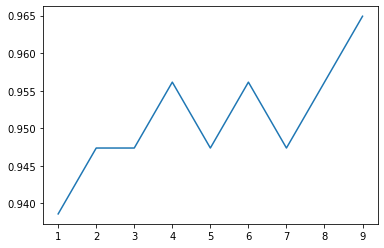

In [15]:
# 绘制图表展示 K 值与模型准确率的关系
plt.plot(range(1,10),knn_score)

In [16]:
# 增加权重为 distance，距离越近的邻居对分类结果的影响越大。
knn_score_w=[KNeighborsClassifier(n_neighbors=i,weights="distance").
             fit(X_train,y_train).score(X_test,y_test) for i in range(1,10)]

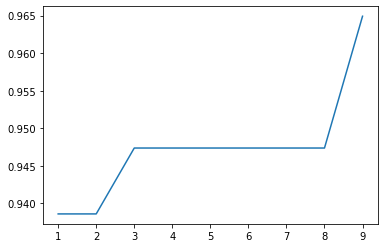

In [17]:
# 绘制图表以观察在基于距离权重下 K 值与准确率的关系
plt.plot(range(1,10),knn_score_w)

In [18]:
# 输出 knn_score_w 和 knn_score 列表中的最大值，用于查看基于距离权重和均匀权重情况下的最佳准确率
max(knn_score_w),max(knn_score)

(0.9649122807017544, 0.9649122807017544)

In [25]:
# 使用曼哈顿距离来计算邻居间的距离
knn_score_w_pl=[KNeighborsClassifier(n_neighbors=i,weights="distance",metric='minkowski',p=1).
                fit(X_train,y_train).score(X_test,y_test) for i in range(1,10)]

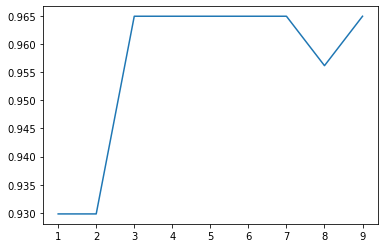

In [20]:
plt.plot(range(1,10),knn_score_w_pl)

In [21]:
max(knn_score_w_pl)#最高点

0.9649122807017544

## 降维

In [22]:
# 使用 PCA 将数据降至 2 维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [24]:
# 创建 KNN 模型，选择 K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 预测并计算准确率
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN 分类模型在降维后数据集上的准确率: {accuracy:.4f}")

KNN 分类模型在降维后数据集上的准确率: 0.9825
